# Machine Learning Final Project 
SVM/SVR for Credircard Usage Prediction - 2 Features

### The Required Packages Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.datasets import make_moons
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

### Loading Data

In [2]:
dta = pd.read_csv(r"C:\Users\kenne\桌面\機器學習\Final Project\
BankCreditcardDataSVM.csv")
# print(dta)
crdt = pd.DataFrame(dta)
# print(crdt)
X = crdt[['Customer_Age', 'Customer_Gender', 'Education_D1_Doctorate', 
          'Education_D2_PostGraduate', 'Education_D3_Graduate', 
          'Education_D4_College', 'Education_D5_HighSchool', 
          'Education_D6_Uneducated', 'Marital_D1_Single', 'Marital_D2_Married', 
          'Marital_D3_Divorced', 'Income_0_40', 'Income_40_60', 
          'Income_60_80', 'Income_80_120', 'Credit_Limit']]
y = crdt['AUR_Percentage']
X

,Customer_Age,Customer_Gender,Education_D1_Doctorate,Education_D2_PostGraduate,Education_D3_Graduate,Education_D4_College,Education_D5_HighSchool,Education_D6_Uneducated,Marital_D1_Single,Marital_D2_Married,Marital_D3_Divorced,Income_0_40,Income_40_60,Income_60_80,Income_80_120,Credit_Limit
0,45,1,0,0,0,0,1,0,0,1,0,0,0,1,0,12691.0
1,49,0,0,0,1,0,0,0,1,0,0,1,0,0,0,8256.0
2,51,1,0,0,1,0,0,0,0,1,0,0,0,0,1,3418.0
3,40,0,0,0,0,0,1,0,0,0,0,1,0,0,0,3313.0
4,40,1,0,0,0,0,0,1,0,1,0,0,0,1,0,4716.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,1,0,0,1,0,0,0,1,0,0,0,1,0,0,4003.0
10123,41,1,0,0,0,0,0,0,0,0,1,0,1,0,0,4277.0
10124,44,0,0,0,0,0,1,0,0,1,0,1,0,0,0,5409.0
10125,30,1,0,0,1,0,0,0,0,0,0,0,1,0,0,5281.0


In [3]:
crdt.describe()

,Customer_Age,Customer_Gender,Education_D1_Doctorate,Education_D2_PostGraduate,Education_D3_Graduate,Education_D4_College,Education_D5_HighSchool,Education_D6_Uneducated,Marital_D1_Single,Marital_D2_Married,Marital_D3_Divorced,Income_0_40,Income_40_60,Income_60_80,Income_80_120,Credit_Limit,AUR_Percentage
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,0.470919,0.044534,0.050953,0.308877,0.100030,0.198776,0.146835,0.389355,0.462822,0.073862,0.351634,0.176755,0.138442,0.151575,8631.953698,27.528093
std,8.016814,0.499178,0.206289,0.219912,0.462053,0.300054,0.399098,0.353959,0.487628,0.498641,0.261559,0.477504,0.381480,0.345380,0.358626,9088.776650,27.586794
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1438.300000,0.000000
25%,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2555.000000,2.000000
50%,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4549.000000,18.000000
75%,52.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,11067.500000,50.000000
max,73.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,34516.000000,100.000000


### Ramdom Sampling

In [4]:
crdtr = crdt.sample(n=1000, replace=False, axis=0)
crdtr

,Customer_Age,Customer_Gender,Education_D1_Doctorate,Education_D2_PostGraduate,Education_D3_Graduate,Education_D4_College,Education_D5_HighSchool,Education_D6_Uneducated,Marital_D1_Single,Marital_D2_Married,Marital_D3_Divorced,Income_0_40,Income_40_60,Income_60_80,Income_80_120,Credit_Limit,AUR_Percentage
8232,52,1,0,0,0,1,0,0,0,1,0,0,0,1,0,7879.0,13
2490,57,1,0,0,0,0,0,1,0,1,0,0,0,1,0,5100.0,39
8329,54,0,0,0,0,0,0,0,1,0,0,0,1,0,0,4440.0,0
5626,33,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1806.0,0
3564,35,0,0,0,1,0,0,0,1,0,0,0,1,0,0,2546.0,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4950,44,1,0,0,0,0,0,1,0,1,0,0,0,0,1,13298.0,13
1248,30,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1512.0,54
7777,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2321.0,51
3821,45,1,0,0,0,0,1,0,0,1,0,0,0,0,1,6366.0,21


In [5]:
'''X = crdtr[['Customer_Age', 'Customer_Gender', 'Education_D1_Doctorate', 
          'Education_D2_PostGraduate', 'Education_D3_Graduate', 'Education_D4_College', 
          'Education_D5_HighSchool', 'Education_D6_Uneducated', 'Marital_D1_Single', 'Marital_D2_Married', 
          'Marital_D3_Divorced', 'Income_0_40', 'Income_40_60', 'Income_60_80', 'Income_80_120', 'Credit_Limit']]'''
X = crdtr[['Customer_Age', 'Credit_Limit']]
y = crdtr['AUR_Percentage']
X

,Customer_Age,Credit_Limit
8232,52,7879.0
2490,57,5100.0
8329,54,4440.0
5626,33,1806.0
3564,35,2546.0
...,...,...
4950,44,13298.0
1248,30,1512.0
7777,40,2321.0
3821,45,6366.0


In [6]:
y

8232    13
2490    39
8329     0
5626     0
3564    53
        ..
4950    13
1248    54
7777    51
3821    21
5190    28
Name: AUR_Percentage, Length: 1000, dtype: int64

### Testing and Training Data

In [7]:
X = X.values
y = y.values
X_train, X_test, y_train, t_test = train_test_split(X, y, 
                                                    test_size=.3, 
                                                    random_state=42)
# print(X, y)
print('Shape of Training Data:', X_train.shape)
print('Shape of Testing Data:', X_test.shape)

Shape of Training Data: (700, 2)
Shape of Testing Data: (300, 2)


### Plotting The Decision Margin

In [8]:
def meshgrid(x, y, h=0.2):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    output = ax.contourf(xx, yy, Z, **params)
    return output

### Principle Component Analysis

In [9]:
## PCA for SVM
pcaSVM = PCA(n_components=2, iterated_power=1)
trainset_reduction = pcaSVM.fit_transform(X_train)
# PCA for SVR
pcaSVR = PCA(n_components=1, iterated_power=1)
X_reduction = pcaSVR.fit_transform(X)

In [10]:
print(trainset_reduction)

[[-3.93290975e+03 -4.12506494e+00]
 [-5.53390924e+03  7.94265798e+00]
 [-5.08290941e+03  3.92358050e+00]
 ...
 [-2.23590916e+03  9.80315128e+00]
 [-3.47690988e+03 -7.14435392e+00]
 [-6.12091004e+03 -1.10325117e+01]]


In [11]:
print(X_reduction)

[[ -668.98686553]
 [-3447.98675864]
 [-4107.98682225]
 [-6741.98726797]
 [-6001.98722563]
 [-7068.98671531]
 [-5757.9869919 ]
 [-7086.98690659]
 [-3575.9870774 ]
 [-6263.98688552]
 [ 2884.01304866]
 [-5404.98733203]
 [-4500.98680091]
 [ 3340.01309106]
 [25968.01323472]
 [-3389.98688617]
 [-4096.98709854]
 [-6268.98658798]
 [-5594.98680066]
 [-7109.68699159]
 [-6134.98684304]
 [-5453.98658816]
 [-7002.98703412]
 [-6407.9866092 ]
 [-5632.98684316]
 [  709.01321917]
 [ 1395.01304899]
 [-6999.98733167]
 [-4337.98709848]
 [-6532.98677919]
 [ 7439.01298387]
 [-5347.987077  ]
 [ 2058.01302759]
 [ 3414.01298478]
 [-6212.98694929]
 [-3091.98686498]
 [ 5834.0127717 ]
 [-3477.98705617]
 [-5305.98716202]
 [ 2477.01307   ]
 [-5848.9871619 ]
 [-3565.98701365]
 [-6856.98703416]
 [-5857.98711939]
 [25968.01317096]
 [18244.01283266]
 [-6665.98697044]
 [-7109.68726788]
 [-6996.98675784]
 [-5624.9867794 ]
 [-7109.68692783]
 [ 1919.01277258]
 [-7107.98677906]
 [-5471.98735326]
 [ 7876.01306878]
 [ 4739.01

### Support Vector Machine

###### Linear SVM

In [12]:
### Linear SVM
linearSvmModel = make_pipeline(StandardScaler(), 
                               SVC(gamma='auto', kernel="linear", 
                                   probability=True, random_state=42, 
                                   verbose=3))

linearSvmModel.fit(X_train, y_train)

[LibSVM]

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(gamma='auto', kernel='linear', probability=True,
                     random_state=42, verbose=3))])

In [13]:
## Prediction & Accuracy
linearPredictionSVM = linearSvmModel.predict(X_train)
linearAccuracySVM = linearSvmModel.score(X_train, y_train)
print('The accurary is:', linearAccuracySVM)

The accurary is: 0.2357142857142857


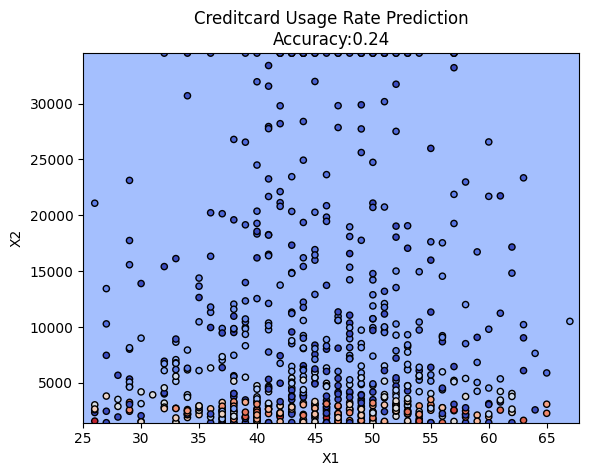

In [32]:
## Plotting
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = meshgrid(X0, X1)
contours(plt, linearSvmModel, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Creditcard Usage Rate Prediction' + '\n' + 
          'Accuracy:%.2f'%linearAccuracySVM)
plt.show()

###### RBF SVM

In [14]:
### RBF SVM
rbfSvmModel = make_pipeline(StandardScaler(), 
                               SVC(gamma='auto', kernel="rbf", 
                                   probability=True, random_state=42, 
                                   verbose=3))

rbfSvmModel.fit(X_train, y_train)

[LibSVM]

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(gamma='auto', probability=True, random_state=42,
                     verbose=3))])

In [15]:
## Prediction & Accuracy
rbfPredictionSVM = rbfSvmModel.predict(X_train)
rbfAccuracySVM = rbfSvmModel.score(X_train, y_train)
print('The accurary is:', rbfAccuracySVM)

The accurary is: 0.24857142857142858


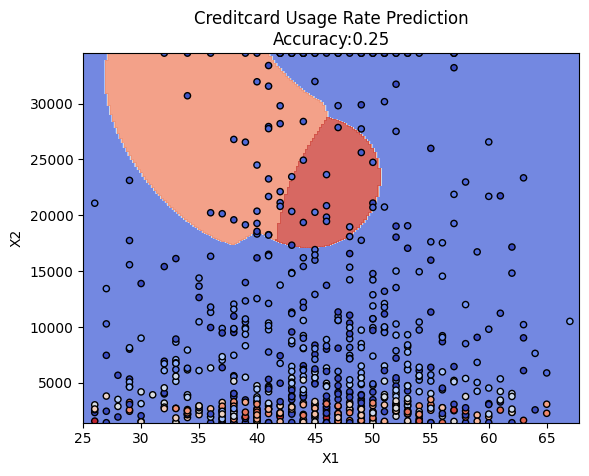

In [33]:
## Plotting
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = meshgrid(X0, X1)
contours(plt, rbfSvmModel, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Creditcard Usage Rate Prediction' + '\n' + 
          'Accuracy:%.2f'%rbfAccuracySVM)
plt.show()

###### Polynomial SVM

In [16]:
### Polynomial SVM
polySvmModel = make_pipeline(StandardScaler(), 
                               SVC(gamma='auto', kernel="poly", 
                                   probability=True, random_state=42, 
                                   verbose=3))

polySvmModel.fit(X_train, y_train)

[LibSVM]

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(gamma='auto', kernel='poly', probability=True,
                     random_state=42, verbose=3))])

In [17]:
## Prediction & Accuracy
polyPredictionSVM = polySvmModel.predict(X_train)
polyAccuracySVM = polySvmModel.score(X_train, y_train)
print('The accurary is:', polyAccuracySVM)

The accurary is: 0.2357142857142857


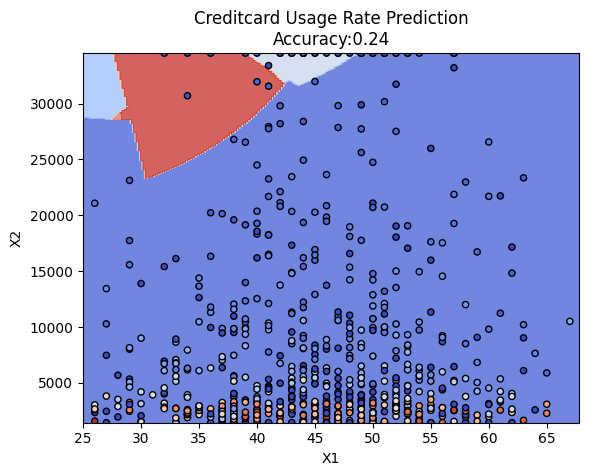

In [34]:
## Plotting
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = meshgrid(X0, X1)
contours(plt, polySvmModel, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Creditcard Usage Rate Prediction' + '\n' + 
          'Accuracy:%.2f'%polyAccuracySVM)
plt.show()

### Support Vector Regression

###### Linear SVR

In [18]:
### Linear SVR
linearSvrModel = make_pipeline(StandardScaler(), 
                               SVR(kernel='linear', C=1.0, epsilon=0.2))
linearSvrModel.fit(X_reduction, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2, kernel='linear'))])

In [19]:
## Model Assessment
predictionSVR = linearSvrModel.predict(X_reduction)
mse = metrics.mean_squared_error(y, predictionSVR)
print('R2 score:', linearSvrModel.score(X_reduction, y))
print('MSE score:', mse)

R2 score: 0.2193062943324482
MSE score: 612.2234320105557


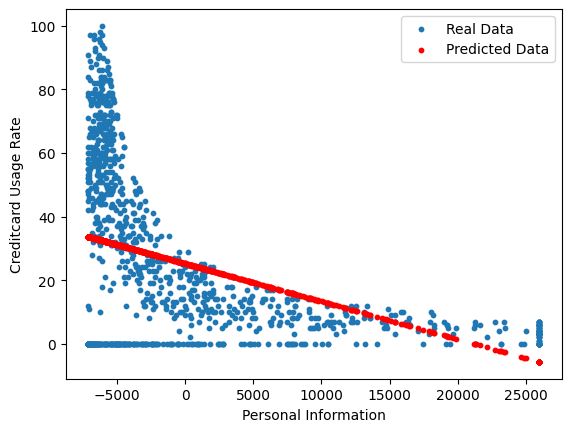

In [20]:
## Plotting
plt.scatter(X_reduction, y, s=10, label='Real Data')
plt.scatter(X_reduction, predictionSVR, color='r', s=10, label='Predicted Data')
plt.xlabel('Personal Information')
plt.ylabel('Creditcard Usage Rate')
plt.legend()

###### RBF SVR

In [21]:
### RBF SVR
rbfSvrModel = make_pipeline(StandardScaler(), 
                               SVR(kernel='rbf', C=1.0, epsilon=0.2))
rbfSvrModel.fit(X_reduction, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [35]:
## Model Assessment
rbfPredictionSVR = rbfSvrModel.predict(X_reduction)
mse = metrics.mean_squared_error(y, rbfPredictionSVR)
print('R2 score:', rbfSvrModel.score(X_reduction, y))
print('MSE score:', mse)

R2 score: 0.3468870556633503
MSE score: 512.1740387677393


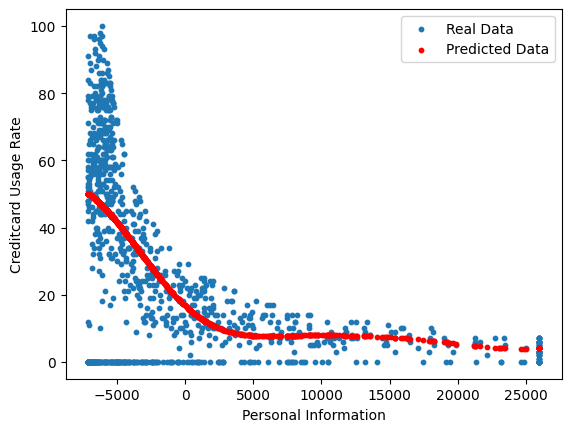

In [23]:
## Plotting
plt.scatter(X_reduction, y, s=10, label='Real Data')
plt.scatter(X_reduction, rbfPredictionSVR, color='r', s=10, label='Predicted Data')
plt.xlabel('Personal Information')
plt.ylabel('Creditcard Usage Rate')
plt.legend()

###### Polynomial SVR

In [24]:
### Polynomial SVR
polySvrModel = make_pipeline(StandardScaler(), 
                               SVR(kernel='poly', C=1.0, epsilon=0.2))
polySvrModel.fit(X_reduction, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2, kernel='poly'))])

In [25]:
## Model Assessment
polyPredictionSVR = polySvrModel.predict(X_reduction)
mse = metrics.mean_squared_error(y, polyPredictionSVR)
print('R2 score:', polySvrModel.score(X_reduction, y))
print('MSE score:', mse)

R2 score: 0.0004467445394510383
MSE score: 783.8540519705073


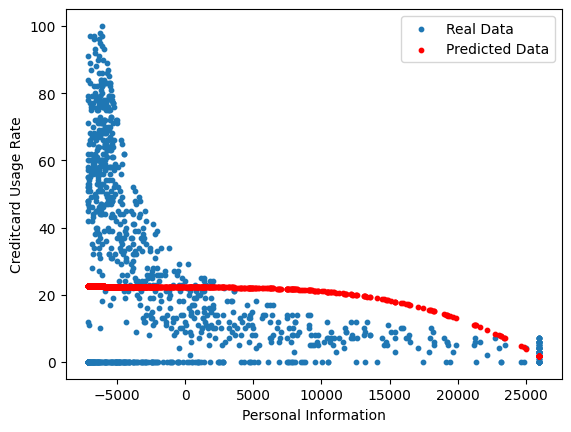

In [26]:
## Plotting
plt.scatter(X_reduction, y, s=10, label='Real Data')
plt.scatter(X_reduction, polyPredictionSVR, color='r', s=10, label='Predicted Data')
plt.xlabel('Personal Information')
plt.ylabel('Creditcard Usage Rate')
plt.legend()

### Linear Regression

In [27]:
## Model Assessment of Linear Regression
lineaR = LinearRegression().fit(X_reduction, y)

predictionLine = lineaR.predict(X_reduction)
mse = metrics.mean_squared_error(y, predictionLine)

print('R2 score:', lineaR.score(X_reduction, y))
print('MSE score:', mse)

R2 score: 0.2427020150183038
MSE score: 593.8764051180982


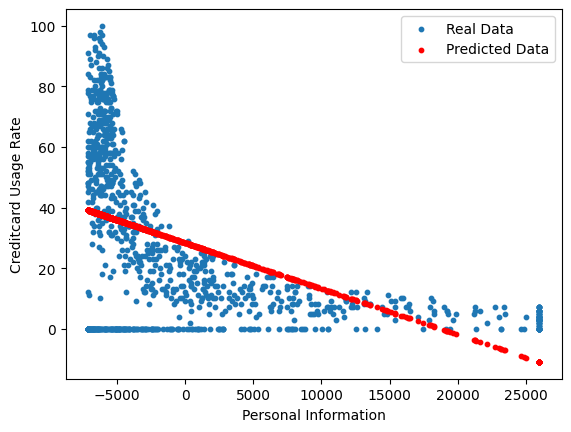

In [28]:
## Plotting
plt.scatter(X_reduction, y, s=10, label='Real Data')
plt.scatter(X_reduction, predictionLine, color='r', s=10, label='Predicted Data')
plt.xlabel('Personal Information')
plt.ylabel('Creditcard Usage Rate')
plt.legend()

### GridSearch CV

In [29]:
parameters = {'kernel':('linear', 'rbf', 'poly'), 'epsilon':[0.1, 0.01]}

svr = svm.SVR()
reg = GridSearchCV(svr, parameters, verbose=10)

reg.fit(X_reduction, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START epsilon=0.1, kernel=linear..................................
[CV 1/5; 1/6] END .epsilon=0.1, kernel=linear;, score=-20.394 total time= 4.9min
[CV 2/5; 1/6] START epsilon=0.1, kernel=linear..................................
[CV 2/5; 1/6] END .epsilon=0.1, kernel=linear;, score=-19.281 total time= 4.8min
[CV 3/5; 1/6] START epsilon=0.1, kernel=linear..................................
[CV 3/5; 1/6] END .epsilon=0.1, kernel=linear;, score=-19.209 total time= 6.1min
[CV 4/5; 1/6] START epsilon=0.1, kernel=linear..................................
[CV 4/5; 1/6] END .epsilon=0.1, kernel=linear;, score=-25.936 total time= 7.4min
[CV 5/5; 1/6] START epsilon=0.1, kernel=linear..................................
[CV 5/5; 1/6] END .epsilon=0.1, kernel=linear;, score=-15.930 total time= 6.7min
[CV 1/5; 2/6] START epsilon=0.1, kernel=rbf.....................................
[CV 1/5; 2/6] END ......epsilon=0.1, kernel=rbf;,

GridSearchCV(estimator=SVR(),
             param_grid={'epsilon': [0.1, 0.01],
                         'kernel': ('linear', 'rbf', 'poly')},
             verbose=10)

In [30]:
reg.score(X_reduction, y)

0.3473339173428197

In [31]:
reg.predict(X_reduction)

array([19.33136135, 33.32814362, 36.89165872, 48.88388352, 46.08217804,
       49.93105378, 45.04032088, 49.98505361, 34.02350358, 47.13859656,
        9.44412032, 43.44316603, 38.96346125,  8.89835442,  4.10046883,
       33.01287348, 36.8329496 , 47.15809642, 44.3153666 , 50.05260024,
       46.62682278, 43.67078314, 49.72975881, 47.68996885, 44.48635661,
       14.22624863, 12.29380392, 49.72048731, 38.11082231, 48.15098343,
        7.84404752, 43.17611756, 10.80800808,  8.82232585, 46.93824767,
       31.39437332,  7.7526684 , 33.49118682, 42.97782281, 10.05219578,
       45.43514194, 33.96921176, 49.2662746 , 45.47379186,  4.10046881,
        6.29157971, 48.62296623, 50.05260106, 49.71120248, 44.45045693,
       50.05260005, 11.08939623, 50.04756247, 43.75394208,  7.89368862,
        7.95518108, 44.40101073, 14.05004987,  7.94883339, 46.52979955,
       49.06531778, 36.16896562,  8.04022622, 43.41983678, 42.52947539,
        8.01875331,  8.64036414, 12.00483123, 46.97773794, 48.36